In [75]:
import matplotlib.pyplot as plt

In [51]:
import pandas as pd


# import data from xlsx file
df = pd.read_excel('Metier.xlsx')

df

,Metiers
0,cadre
1,"cadre, employé"
2,ouvrier
3,cadre
4,étudiant
...,...
599,employés
600,employé
601,"ouvrier, employé"
602,employés


In [52]:
df['Metiers'] = df['Metiers'].str.lower()
df

,Metiers
0,cadre
1,"cadre, employé"
2,ouvrier
3,cadre
4,étudiant
...,...
599,employés
600,employé
601,"ouvrier, employé"
602,employés


In [53]:
# replace 'é' with 'e'
df['Metiers'] = df['Metiers'].str.replace('é', 'e')
df

,Metiers
0,cadre
1,"cadre, employe"
2,ouvrier
3,cadre
4,etudiant
...,...
599,employes
600,employe
601,"ouvrier, employe"
602,employes


In [61]:
# replace employes with employe
df['Metiers'] = df['Metiers'].str.replace('employes', 'employe')
df['Metiers'] = df['Metiers'].str.replace('cadres', 'cadre')
df['Metiers'] = df['Metiers'].str.replace('Ouvriers', 'Ouvrier')
df['Metiers'] = df['Metiers'].str.replace('carde', 'cadre')
df['Metiers'] = df['Metiers'].str.replace('etudiante', 'etudiant')
df['Metiers'] = df['Metiers'].str.replace('etudient', 'etudiant')

df

,Metiers
0,cadre
1,cadre
1,employe
2,ouvrier
3,cadre
...,...
600,employe
601,ouvrier
601,employe
602,employe


In [62]:
# some columns have more than one metier, we need to split them into multiple rows
df = df.assign(Metiers=df.Metiers.str.split(',')).explode('Metiers')
df

,Metiers
0,cadre
1,cadre
1,employe
2,ouvrier
3,cadre
...,...
600,employe
601,ouvrier
601,employe
602,employe


In [63]:
df = df.assign(Metiers=df.Metiers.str.split('-')).explode('Metiers')
df = df.assign(Metiers=df.Metiers.str.split('+')).explode('Metiers')
df = df.assign(Metiers=df.Metiers.str.split('/')).explode('Metiers')
df

,Metiers
0,cadre
1,cadre
1,employe
2,ouvrier
3,cadre
...,...
600,employe
601,ouvrier
601,employe
602,employe


In [64]:
df['Metiers'] = df['Metiers'].str.strip()

In [87]:
# export to csv file
df.to_csv('metiers.csv', index=False)


In [65]:
# create a dataframe with the metiers and the number of occurences
df_metiers = pd.DataFrame(df['Metiers'].value_counts())
df_metiers

,Metiers
employe,301
etudiant,129
cadre,104
ouvrier,80
retraite,28
sans activite,26
autre,5
manœuvre,3
pas de travail,2
entrepreneur,2


In [67]:
# sum all the numbers of occurences of metiers that occure less than 10 times
df_metiers[df_metiers['Metiers'] < 10].sum()

Metiers    43
dtype: int64

In [68]:
# create a dataframe with the metiers and the number of occurences of metiers that occure more than 10 times
df_metiers = df_metiers[df_metiers['Metiers'] > 10]
df_metiers

,Metiers
employe,301
etudiant,129
cadre,104
ouvrier,80
retraite,28
sans activite,26


In [70]:
# add a row named 'Autres' with the value 43
df_metiers.loc['Autres'] = 43
df_metiers

C:\Users\moham\AppData\Local\Temp\ipykernel_8528\1562508592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metiers.loc['Autres'] = 43


,Metiers
employe,301
etudiant,129
cadre,104
ouvrier,80
retraite,28
sans activite,26
Autres,43


In [72]:
df_metiers = df_metiers.rename(index={'employe': 'Employé'})
df_metiers = df_metiers.rename(index={'etudiant': 'Etudiant'})
df_metiers = df_metiers.rename(index={'cadre': 'Cadre'})
df_metiers = df_metiers.rename(index={'ouvrier': 'Ouvrier'})
df_metiers = df_metiers.rename(index={'retraite': 'Retraité'})
df_metiers = df_metiers.rename(index={'sans activite': 'Sans Activité'})
df_metiers


,Metiers
Employé,301
Etudiant,129
Cadre,104
Ouvrier,80
Retraité,28
Sans Activité,26
Autres,43


In [88]:
# export to csv file
df_metiers.to_csv('metiers_count.csv', index=True)


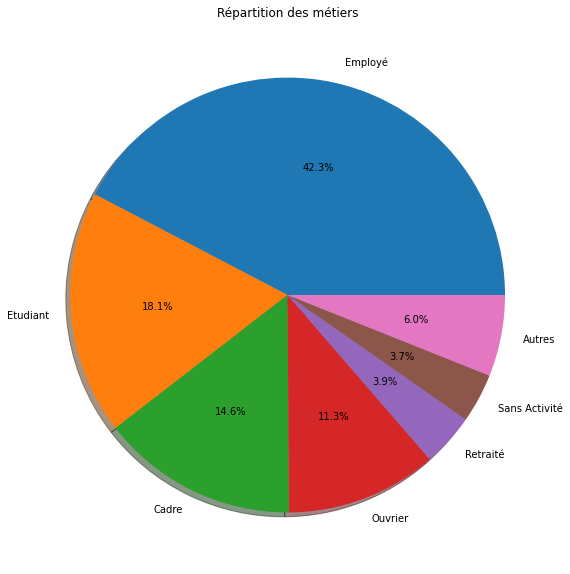

In [85]:
# plot the data with a pie chart made with matplotlib

plt.figure(figsize=(10,10))
plt.pie(df_metiers['Metiers'], labels=df_metiers.index, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Répartition des métiers')
plt.show()


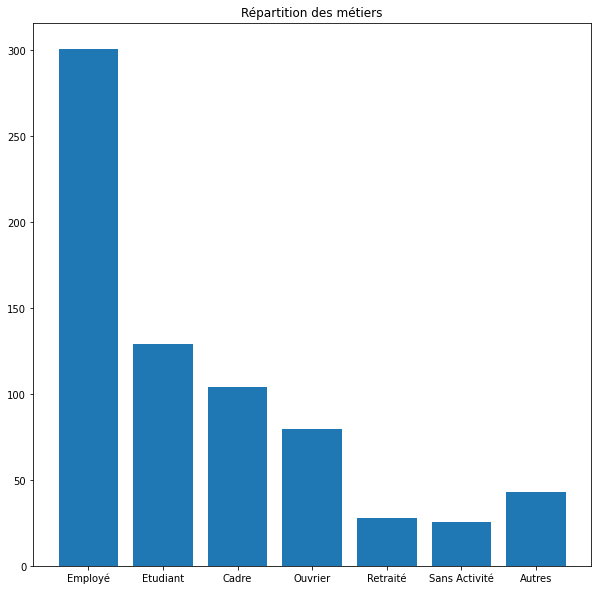

In [86]:
# plot the data with bar chart made with matplotlib

plt.figure(figsize=(10,10))
plt.bar(df_metiers.index, df_metiers['Metiers'])
plt.title('Répartition des métiers')
plt.show()